# Визуализация

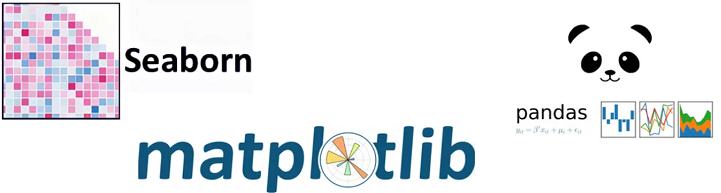

Главной библиотекой построения графиков является Matplotlib. 
На ее основе, созданы средства визуализации в Seaborn, Plotly, pandas. 


Matplotlib может создать любой график, но с его помощью может быть сложно построить или подогнать сложные графики, чтобы они выглядели презентабельно.

С помощью Matplotlib можно создать что угодно, но для сложных графиков может потребоваться гораздо больше кода, чем другим библиотекам, потому что Matplotlib имеет чрезвычайно низкоуровневый интерфейс.

Seaborn - это библиотека Python для визуализации данных, построенная на базе Matplotlib. Она более высокоуровневая, что упрощает ее использование.Минусы: Seaborn более ограничен и не имеет такой широкой коллекции графиков, как matplotlib. 

Графики из pandas очень быстро можно построить, однако, грасотой они н еотличаются.

https://habr.com/ru/company/otus/blog/558478/

https://matplotlib.org/


In [5]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

import numpy as np

# Библиотека pandas

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plotting-tools

# Plot

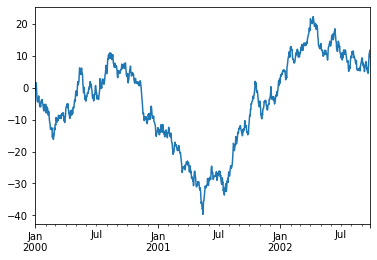

In [24]:
ts = pd.Series(np.random.randn(1000), # список из 1000 элементов
                index=pd.date_range("1/1/2000", # список из дат от 1/1/2000
                periods=1000))

ts = ts.cumsum() # кумулятивная сумма (например, дан [1,3,5,7], cumsum вернет [1,4,9,16])

ts.plot();

<AxesSubplot:>

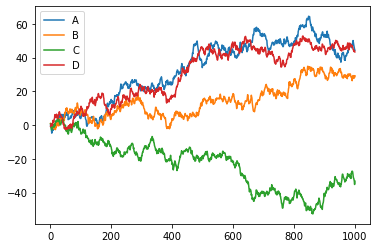

In [169]:
df = pd.DataFrame(np.random.randn(1000, 4), # матрица 1000 на 4 из рандомных чисел
                  index=list(range(1,1001)), # список от 1 до 1000
                  columns=list("ABCD")) #название колонок

df = df.cumsum() # кумулятивная сумма (например, дан [1,3,5,7], cumsum вернет [1,4,9,16])

df.plot() # построим графики всех колонок, ось х это индексы. Автоматически разный цвет и легенда с подписями

<AxesSubplot:xlabel='A'>

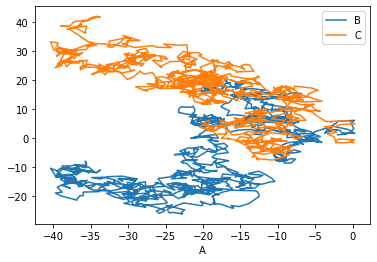

In [28]:
df.plot(x='A', y=['B', 'C']) # Выберем по оси х колонку А, по оси у колонки В и С

<AxesSubplot:>

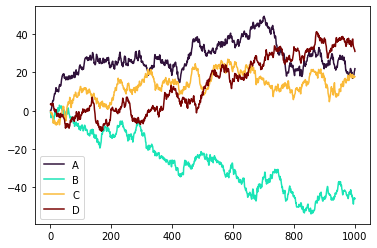

In [162]:
df.plot(colormap='turbo')

colormap=['turbo', 'viridis', 'plasma', 'OrRd', 'BuGn', 'cool']

# различные colormap
# https://matplotlib.org/stable/tutorials/colors/colormaps.html  

# Bar plot


<AxesSubplot:>

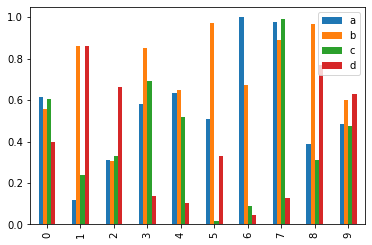

In [33]:
df2 = pd.DataFrame(np.random.rand(10, 4),
                   columns=["a", "b", "c", "d"])

df2.plot.bar()

<AxesSubplot:>

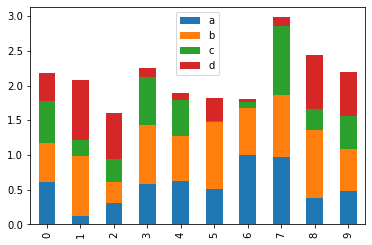

In [34]:
df2.plot.bar(stacked=True) #Отобразим предыдущий бар-плот в более удобном виде

<AxesSubplot:>

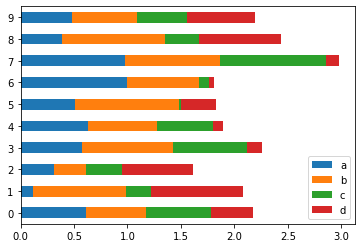

In [36]:
df2.plot.barh(stacked=True) # для разворота графика требуется использовать barh

# Histogram

<AxesSubplot:ylabel='Frequency'>

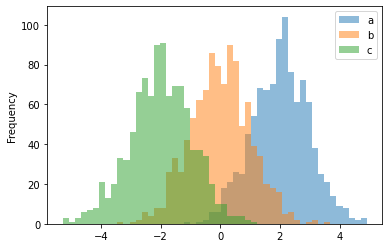

In [62]:
df4 = pd.DataFrame(
    {
        "a": np.random.randn(1000) + 2,
        "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 2,
    },
    columns=["a", "b", "c"])


df4.plot.hist(alpha=0.5,bins=50) # alpha параметр прозрачности, bins количество разбиений 

<AxesSubplot:xlabel='Frequency'>

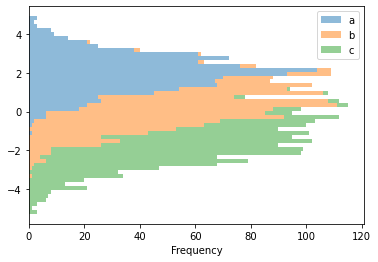

In [64]:
df4.plot.hist(alpha=0.5,
              bins=50,
              stacked=True,
              orientation="horizontal") #наложение stacked, ориентация orientation


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'c'}>, <AxesSubplot:>]], dtype=object)

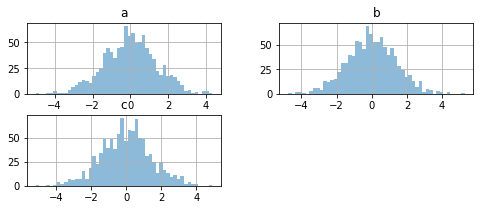

In [73]:
df4.diff().hist(alpha=0.5, 
                bins=50,
                figsize=(8, 3)) # задать размер параметром figsize

# Box plots

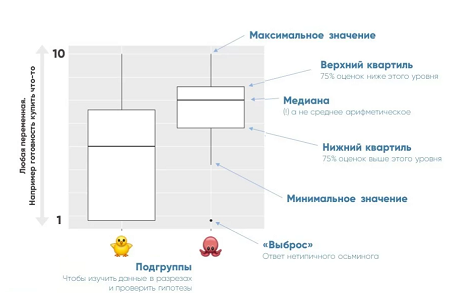

##### Медиана – 
это значение элемента в центре ранжированного ряда.
Например, если всех осьминогов выставить в порядке возрастания их оценок, то медианой будет та оценка, которую поставил осьминог в середине. А это значит, что половина осьминогов справа оценили вероятность покупки ниже, а другая половина (слева) выше, чем медианный.
##### Верхний квартиль –
это такая оценка, выше которой только 25% оценок.
#####  Нижний квартиль – 
это такое значение, ниже которого только 25% оценок.
#####  Межквартильный размах (МКР) –
это разница между 75% и 25% квартилем. Внутри этого диапазона лежит 50% наблюдений. Если диапазон узкий (как в случае с осьминогами), значит члены подгруппы единогласны в своих оценках. Если широкий – значит однородного мнения нет (как у цыплят).
##### Выбросы –
это нетипичные наблюдения. Что именно считать нетипичным? Те оценки, которые выходят за пределы:
значения 25% перцентили минус 1.5 х МКР
значения 75% перцентили плюс 1.5 х МКР
Уровень значимости не имеет отношения к ящику, но часто результаты стат. тестов и боксплоты удобно показать вместе. Коротко: если p-value меньше 0.05, значит различия между подгруппами НЕ случайны (т.е. различия между подгруппам статистически значимы).

<AxesSubplot:>

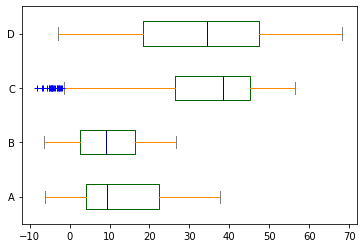

In [79]:
color = {
    "boxes": "DarkGreen", # цвет прямоугольника, ограниченого 75 квартилем
    "whiskers": "DarkOrange", # цвет max-min
    "medians": "DarkBlue", # цвет медианы
    "caps": "Gray", # ограничения на конце 
}


df.plot.box(color=color, 
            sym="b+", # как обозначить выбросы
            vert=False) # ориентация

# Scatter plot

In [167]:
df=pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


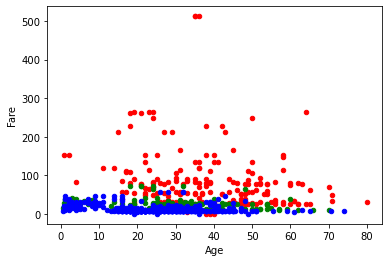

In [202]:
ax1 = df[df['Pclass']==1].plot(kind='scatter', x='Age', y='Fare', color='r')    
ax2 = df[df['Pclass']==2].plot(kind='scatter', x='Age', y='Fare', color='g', ax=ax1)    
ax3 = df[df['Pclass']==3].plot(kind='scatter', x='Age', y='Fare', color='b', ax=ax1)

# Pie plot

array([<AxesSubplot:ylabel='x'>, <AxesSubplot:ylabel='y'>], dtype=object)

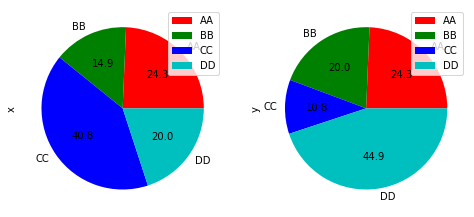

In [105]:
df = pd.DataFrame(
    3 * np.random.rand(4, 2), index=["a", "b", "c", "d"], columns=["x", "y"]
)


df.plot.pie(subplots=True, # параметр, разрещающий несколько графиков
            figsize=(8, 8),
            labels=["AA", "BB", "CC", "DD"], # легенда
            colors=["r", "g", "b", "c"], # цвета
            autopct="%.1f", # надпись, результат
            fontsize=10) # размер шрифта

# Scatter_matrix

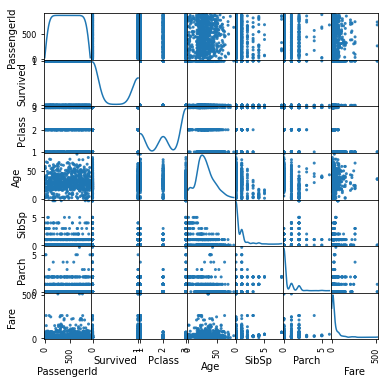

In [148]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.9, figsize=(6, 6), diagonal="kde");

# Библиотека seaborn

https://seaborn.pydata.org/tutorial.html

# Plot

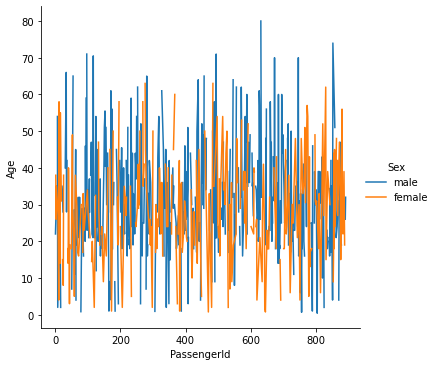

In [230]:
sns.relplot(x="PassengerId", 
            y="Age", 
            hue="Sex",
            kind="line", 
            data=df);

# Bar plot

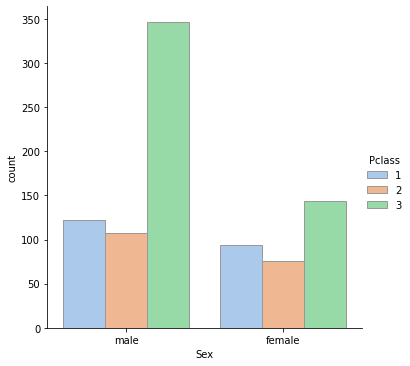

In [189]:
df=pd.read_csv('titanic_dataset.csv')


sns.catplot(x="Sex", 
            hue="Pclass", 
            kind="count",
            palette="pastel", 
            edgecolor="0.6",
            data=df)

# Box plots

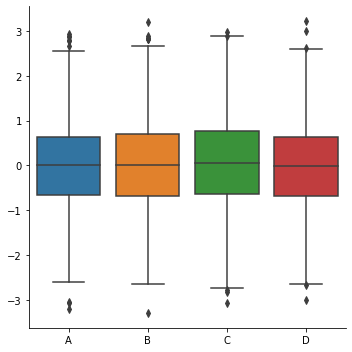

In [179]:
df = pd.DataFrame(np.random.randn(1000, 4), # матрица 1000 на 4 из рандомных чисел
                  index=list(range(1,1001)), # список от 1 до 1000
                  columns=list("ABCD")) #название колонок

sns.catplot(kind="box", data=df)


# Scatter plot

<AxesSubplot:xlabel='Age', ylabel='Fare'>

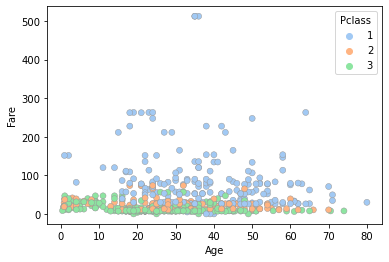

In [198]:
sns.scatterplot(x="Age",
            y='Fare',
            hue="Pclass",
            palette="pastel", 
            edgecolor="0.6",
            data=df)


# pair_plot

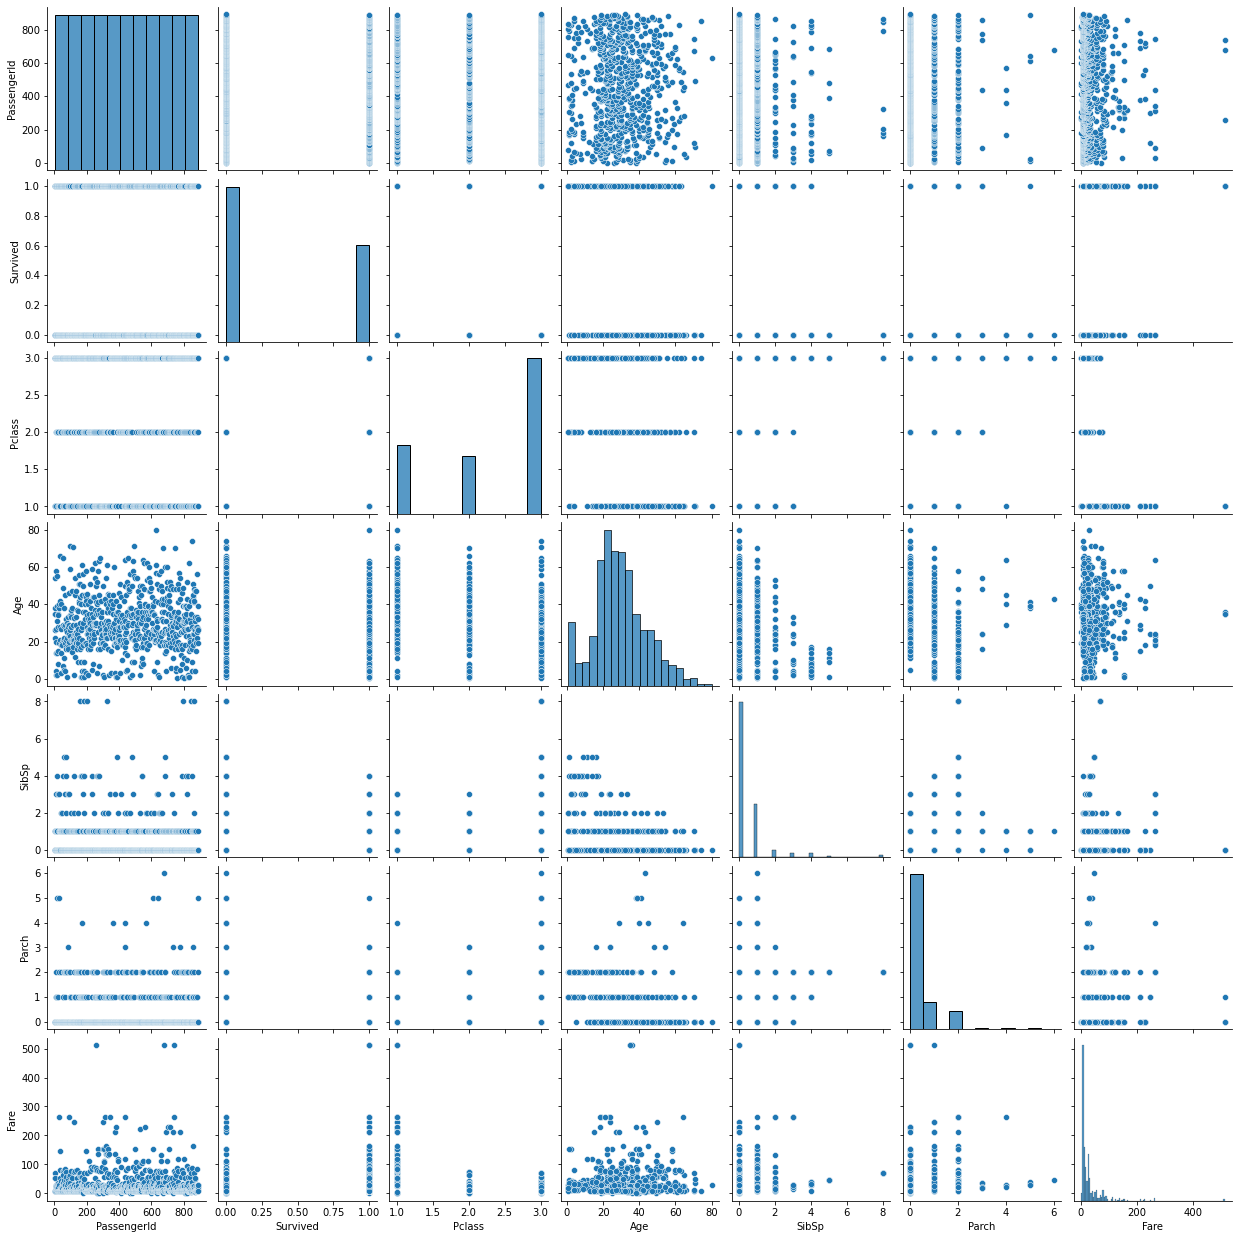

In [168]:
sns.pairplot(df)

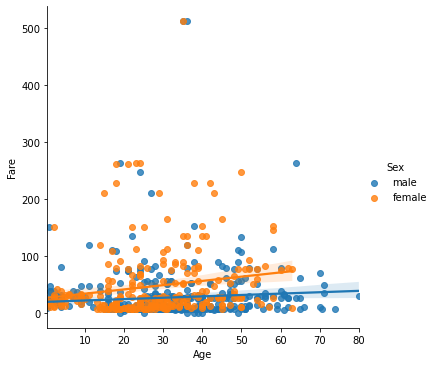

In [218]:

sns.lmplot(data=df, x='Age', y='Fare',
             hue="Sex");

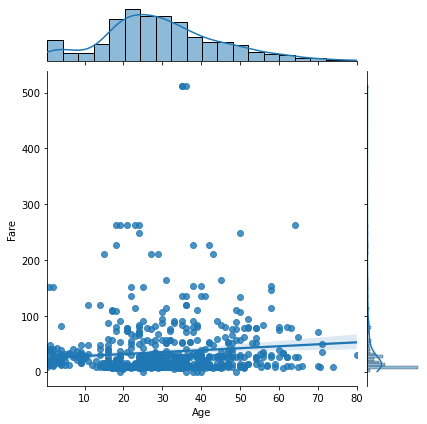

In [209]:
sns.jointplot(x="Age", y="Fare", data=df, kind="reg");